<a href="https://colab.research.google.com/github/outlaw-xd/Nifty50_Analysis/blob/main/ml_model_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


from google.colab import drive

In [ ]:
#LOAD UPDATED DATASET
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/nifty_50.csv')
df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

# Feature Modification
df['Pct_Change'] = df['Close'].pct_change()
df['HL_Range'] = (df['High'] - df['Low']) / df['Low']
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)

Mounted at /content/drive


In [ ]:
#Z-SCORE NORMALIZATION
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Pct_Change', 'HL_Range']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
X_df = pd.DataFrame(X_scaled, columns=features)

# Create sequences for LSTM
def create_sequences(X, y, time_steps=20):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X, y = create_sequences(X_df.values, df['Target'].values)

In [ ]:
#TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
#TUNED LSTM MODEL
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 128)        │        69,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,105 (465.25 KB)

 Trainable params: 119,105 (465.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Model Trainining
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.5189 - loss: 0.6947 - val_accuracy: 0.5495 - val_loss: 0.6925
Epoch 2/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.5406 - loss: 0.6902 - val_accuracy: 0.5149 - val_loss: 0.6925
Epoch 3/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.5424 - loss: 0.6901 - val_accuracy: 0.4901 - val_loss: 0.6931
Epoch 4/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.5481 - loss: 0.6885 - val_accuracy: 0.5223 - val_loss: 0.6931
Epoch 5/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.5389 - loss: 0.6893 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 6/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.5463 - loss: 0.6900 - val_accuracy: 0.4851 - val_loss: 0.6937
Epoch 7/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5242 - loss: 0.6927 - val_accuracy: 0.4728 - val_loss: 0.6936
Epoch 8/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.5384 - loss: 0.6873 - val_ac

In [ ]:
# Confusion Matrix
y_pred_prob = model.predict(X_test)
threshold = 0.4
y_pred = (y_pred_prob > threshold).astype(int)

print("\n Evaluation Metrics (threshold = {:.1f}):".format(threshold))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1 Score :", f1_score(y_test, y_pred, zero_division=0))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step

 Evaluation Metrics (threshold = 0.4):
Accuracy : 0.5277777777777778
Precision: 0.5318275154004107
Recall   : 0.9628252788104089
F1 Score : 0.6851851851851852


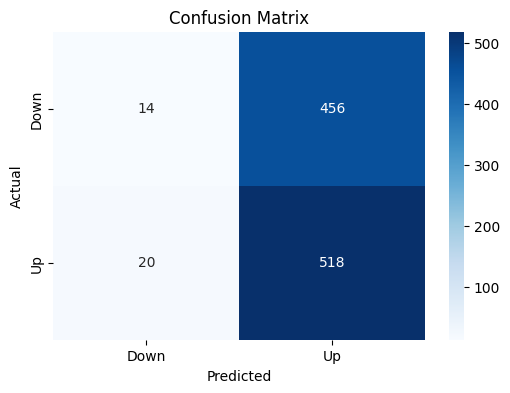

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Down', 'Up'], zero_division=0))


 Classification Report:
              precision    recall  f1-score   support

        Down       0.41      0.03      0.06       470
          Up       0.53      0.96      0.69       538

    accuracy                           0.53      1008
   macro avg       0.47      0.50      0.37      1008
weighted avg       0.48      0.53      0.39      1008

